In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
sys.path.append(os.path.abspath('../source'))

In [2]:
data_2017 = pd.read_csv('../data/FARS_data_2017.csv')
data_2018 = pd.read_csv('../data/FARS_data_2018.csv')
data_2019 = pd.read_csv('../data/FARS_data_2019.csv')
data_2020 = pd.read_csv('../data/FARS_data_2020.csv')
data_2021 = pd.read_csv('../data/FARS_data_2021.csv')
data_2022 = pd.read_csv('../data/FARS_data_2022.csv')

/tmp/ipykernel_82217/2599200083.py:1: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2017 = pd.read_csv('../data/FARS_data_2017.csv')


In [3]:
df = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021, data_2022], ignore_index=True)
df.head()

,caseyear,state,st_case,statename,ve_total,ve_forms,pvh_invl,peds,pernotmvit,permvit,...,hosp_mn,hosp_mnname,cf1,cf1name,cf2,cf2name,cf3,cf3name,fatals,drunk_dr
0,2017,1,10001,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
1,2017,1,10002,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
2,2017,1,10003,Alabama,3,3,0,0,0,3,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
3,2017,1,10004,Alabama,1,1,0,0,0,1,...,88,Not Applicable (Not Transported),20.0,Police Pursuit Involved,0.0,NaN,0.0,NaN,1,0.0
4,2017,1,10005,Alabama,1,1,0,0,0,2,...,11,11,0.0,NaN,0.0,NaN,0.0,NaN,1,0.0


In [4]:
df.shape

(218576, 93)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218576 entries, 0 to 218575
Data columns (total 93 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   caseyear      218576 non-null  int64  
 1   state         218576 non-null  int64  
 2   st_case       218576 non-null  int64  
 3   statename     218576 non-null  object 
 4   ve_total      218576 non-null  int64  
 5   ve_forms      218576 non-null  int64  
 6   pvh_invl      218576 non-null  int64  
 7   peds          218576 non-null  int64  
 8   pernotmvit    218576 non-null  int64  
 9   permvit       218576 non-null  int64  
 10  persons       218576 non-null  int64  
 11  county        218576 non-null  int64  
 12  countyname    218576 non-null  object 
 13  city          218576 non-null  int64  
 14  cityname      218576 non-null  object 
 15  day           218576 non-null  int64  
 16  month         218576 non-null  int64  
 17  monthname     218576 non-null  object 
 18  year

In [6]:
df.columns

Index(['caseyear', 'state', 'st_case', 'statename', 've_total', 've_forms',
       'pvh_invl', 'peds', 'pernotmvit', 'permvit', 'persons', 'county',
       'countyname', 'city', 'cityname', 'day', 'month', 'monthname', 'year',
       'day_week', 'day_weekname', 'hour', 'hourname', 'minute', 'minutename',
       'nhs', 'nhsname', 'rur_urb', 'rur_urbname', 'func_sys', 'func_sysname',
       'rd_owner', 'rd_ownername', 'route', 'routename', 'tway_id', 'tway_id2',
       'milept', 'mileptname', 'latitude', 'latitudename', 'longitud',
       'longitudname', 'sp_jur', 'sp_jurname', 'harm_ev', 'harm_evname',
       'man_coll', 'man_collname', 'reljct1', 'reljct1name', 'reljct2',
       'reljct2name', 'typ_int', 'typ_intname', 'wrk_zone', 'wrk_zonename',
       'road_fnc', 'road_fncname', 'rel_road', 'rel_roadname', 'lgt_cond',
       'lgt_condname', 'weather1', 'weather1name', 'weather2', 'weather2name',
       'weather', 'weathername', 'sch_bus', 'sch_busname', 'rail', 'railname',
       'no

In [7]:
df = df[[
    "countyname",      
    "cityname",        
    "statename",       
    "hour",            
    "minute",         
    "rd_ownername",   
    "milept",          
    "harm_evname",     
    "man_collname",            
    "fatals",          
    "drunk_dr",        
    "arr_hour",       
    "arr_min",         
    "hosp_hr",         
    "hosp_mn"          
]]


In [8]:
df

,countyname,cityname,statename,hour,minute,rd_ownername,milept,harm_evname,man_collname,fatals,drunk_dr,arr_hour,arr_min,hosp_hr,hosp_mn
0,JEFFERSON (73),BESSEMER,Alabama,23,35,State Highway Agency,10,Fence,Not a Collision with Motor Vehicle In-Transport,1,0.0,99,99,88,88
1,MADISON (89),HUNTSVILLE,Alabama,14,59,State Highway Agency,70,Rollover/Overturn,Not a Collision with Motor Vehicle In-Transport,1,0.0,15,9,88,88
2,MONTGOMERY (101),MONTGOMERY,Alabama,20,31,State Highway Agency,100,Motor Vehicle In-Transport,Front-to-Rear,1,0.0,99,99,88,88
3,JEFFERSON (73),BIRMINGHAM,Alabama,16,55,City or Municipal Highway Agency,0,Utility Pole/Light Support,Not a Collision with Motor Vehicle In-Transport,1,0.0,16,58,88,88
4,BUTLER (13),NOT APPLICABLE,Alabama,20,0,State Highway Agency,1383,Embankment,Not a Collision with Motor Vehicle In-Transport,1,0.0,20,31,21,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218571,SWEETWATER (37),ROCK SPRINGS,Wyoming,11,27,State Highway Agency,1030,Motor Vehicle In-Transport,Front-to-Front,1,NaN,11,35,12,4
218572,LINCOLN (23),NOT APPLICABLE,Wyoming,7,0,Other State Agency,0,Rollover/Overturn,The First Harmful Event was Not a Collision wi...,1,NaN,99,98,88,88
218573,LARAMIE (21),CHEYENNE,Wyoming,15,0,City or Municipal Highway Agency,1020,Curb,The First Harmful Event was Not a Collision wi...,1,NaN,15,7,15,27
218574,JOHNSON (19),NOT APPLICABLE,Wyoming,0,1,Bureau of Land Management,0,Boulder,The First Harmful Event was Not a Collision wi...,1,NaN,7,40,88,88


In [9]:
df.dtypes

countyname       object
cityname         object
statename        object
hour              int64
minute            int64
rd_ownername     object
milept            int64
harm_evname      object
man_collname     object
fatals            int64
drunk_dr        float64
arr_hour          int64
arr_min           int64
hosp_hr           int64
hosp_mn           int64
dtype: object

In [10]:
df.isnull().sum()

countyname          0
cityname            0
statename           0
hour                0
minute              0
rd_ownername        0
milept              0
harm_evname         0
man_collname        0
fatals              0
drunk_dr        79595
arr_hour            0
arr_min             0
hosp_hr             0
hosp_mn             0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
null_columns = df.columns[df.isnull().any()]
null_columns

Index([], dtype='object')

In [13]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [14]:
df.duplicated().sum()

np.int64(157)

In [15]:
print(df.describe(include="object"))

              countyname        cityname   statename          rd_ownername  \
count             138981          138981      138981                138981   
unique              3038            7595          52                    26   
top     LOS ANGELES (37)  NOT APPLICABLE  California  State Highway Agency   
freq                2800           68081       14154                 77852   

                       harm_evname  \
count                       138981   
unique                          58   
top     Motor Vehicle In-Transport   
freq                         54005   

                                             man_collname  
count                                              138981  
unique                                                 13  
top     The First Harmful Event was Not a Collision wi...  
freq                                                42773  


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,138981.0,13.613573,10.107031,0.0,7.0,14.0,19.0,99.0
minute,138981.0,29.123650,18.396849,0.0,14.0,30.0,44.0,99.0
milept,138981.0,18707.974889,38765.609017,0.0,0.0,76.0,761.0,99999.0
fatals,138981.0,1.085033,0.348600,1.0,1.0,1.0,1.0,20.0
drunk_dr,138981.0,0.271246,0.462748,0.0,0.0,0.0,1.0,4.0
arr_hour,138981.0,58.733251,42.955118,0.0,15.0,99.0,99.0,99.0
arr_min,138981.0,66.265454,36.519046,0.0,31.0,98.0,99.0,99.0
hosp_hr,138981.0,73.566675,35.287333,0.0,23.0,88.0,99.0,99.0
hosp_mn,138981.0,77.522899,29.703078,0.0,59.0,88.0,99.0,99.0


In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])


for col in numerical_cols:
    print(f"\n--- Handling Outliers for {col} ---")


    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"Number of Outliers: {len(outliers)}")

    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

    print(f"Outliers handled using capping/flooring.")

    
    Q1_new = df[col].quantile(0.25)
    Q3_new = df[col].quantile(0.75)
    IQR_new = Q3_new - Q1_new
    lower_limit_new = Q1_new - 1.5 * IQR_new
    upper_limit_new = Q3_new + 1.5 * IQR_new

    outliers_after = df[(df[col] < lower_limit_new) | (df[col] > upper_limit_new)]
    print(f"Number of Outliers after handling: {len(outliers_after)}")


--- Handling Outliers for hour ---
Number of Outliers: 1036
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for minute ---
Number of Outliers: 1037
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for milept ---
Number of Outliers: 29140
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for fatals ---
Number of Outliers: 9700
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for drunk_dr ---
Number of Outliers: 15
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for arr_hour ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for arr_min ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Out

/tmp/ipykernel_82217/1881079761.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
/tmp/ipykernel_82217/1881079761.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
/tmp/ipykernel_82217/1881079761.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [18]:

df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

/tmp/ipykernel_82217/4097196349.py:17: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


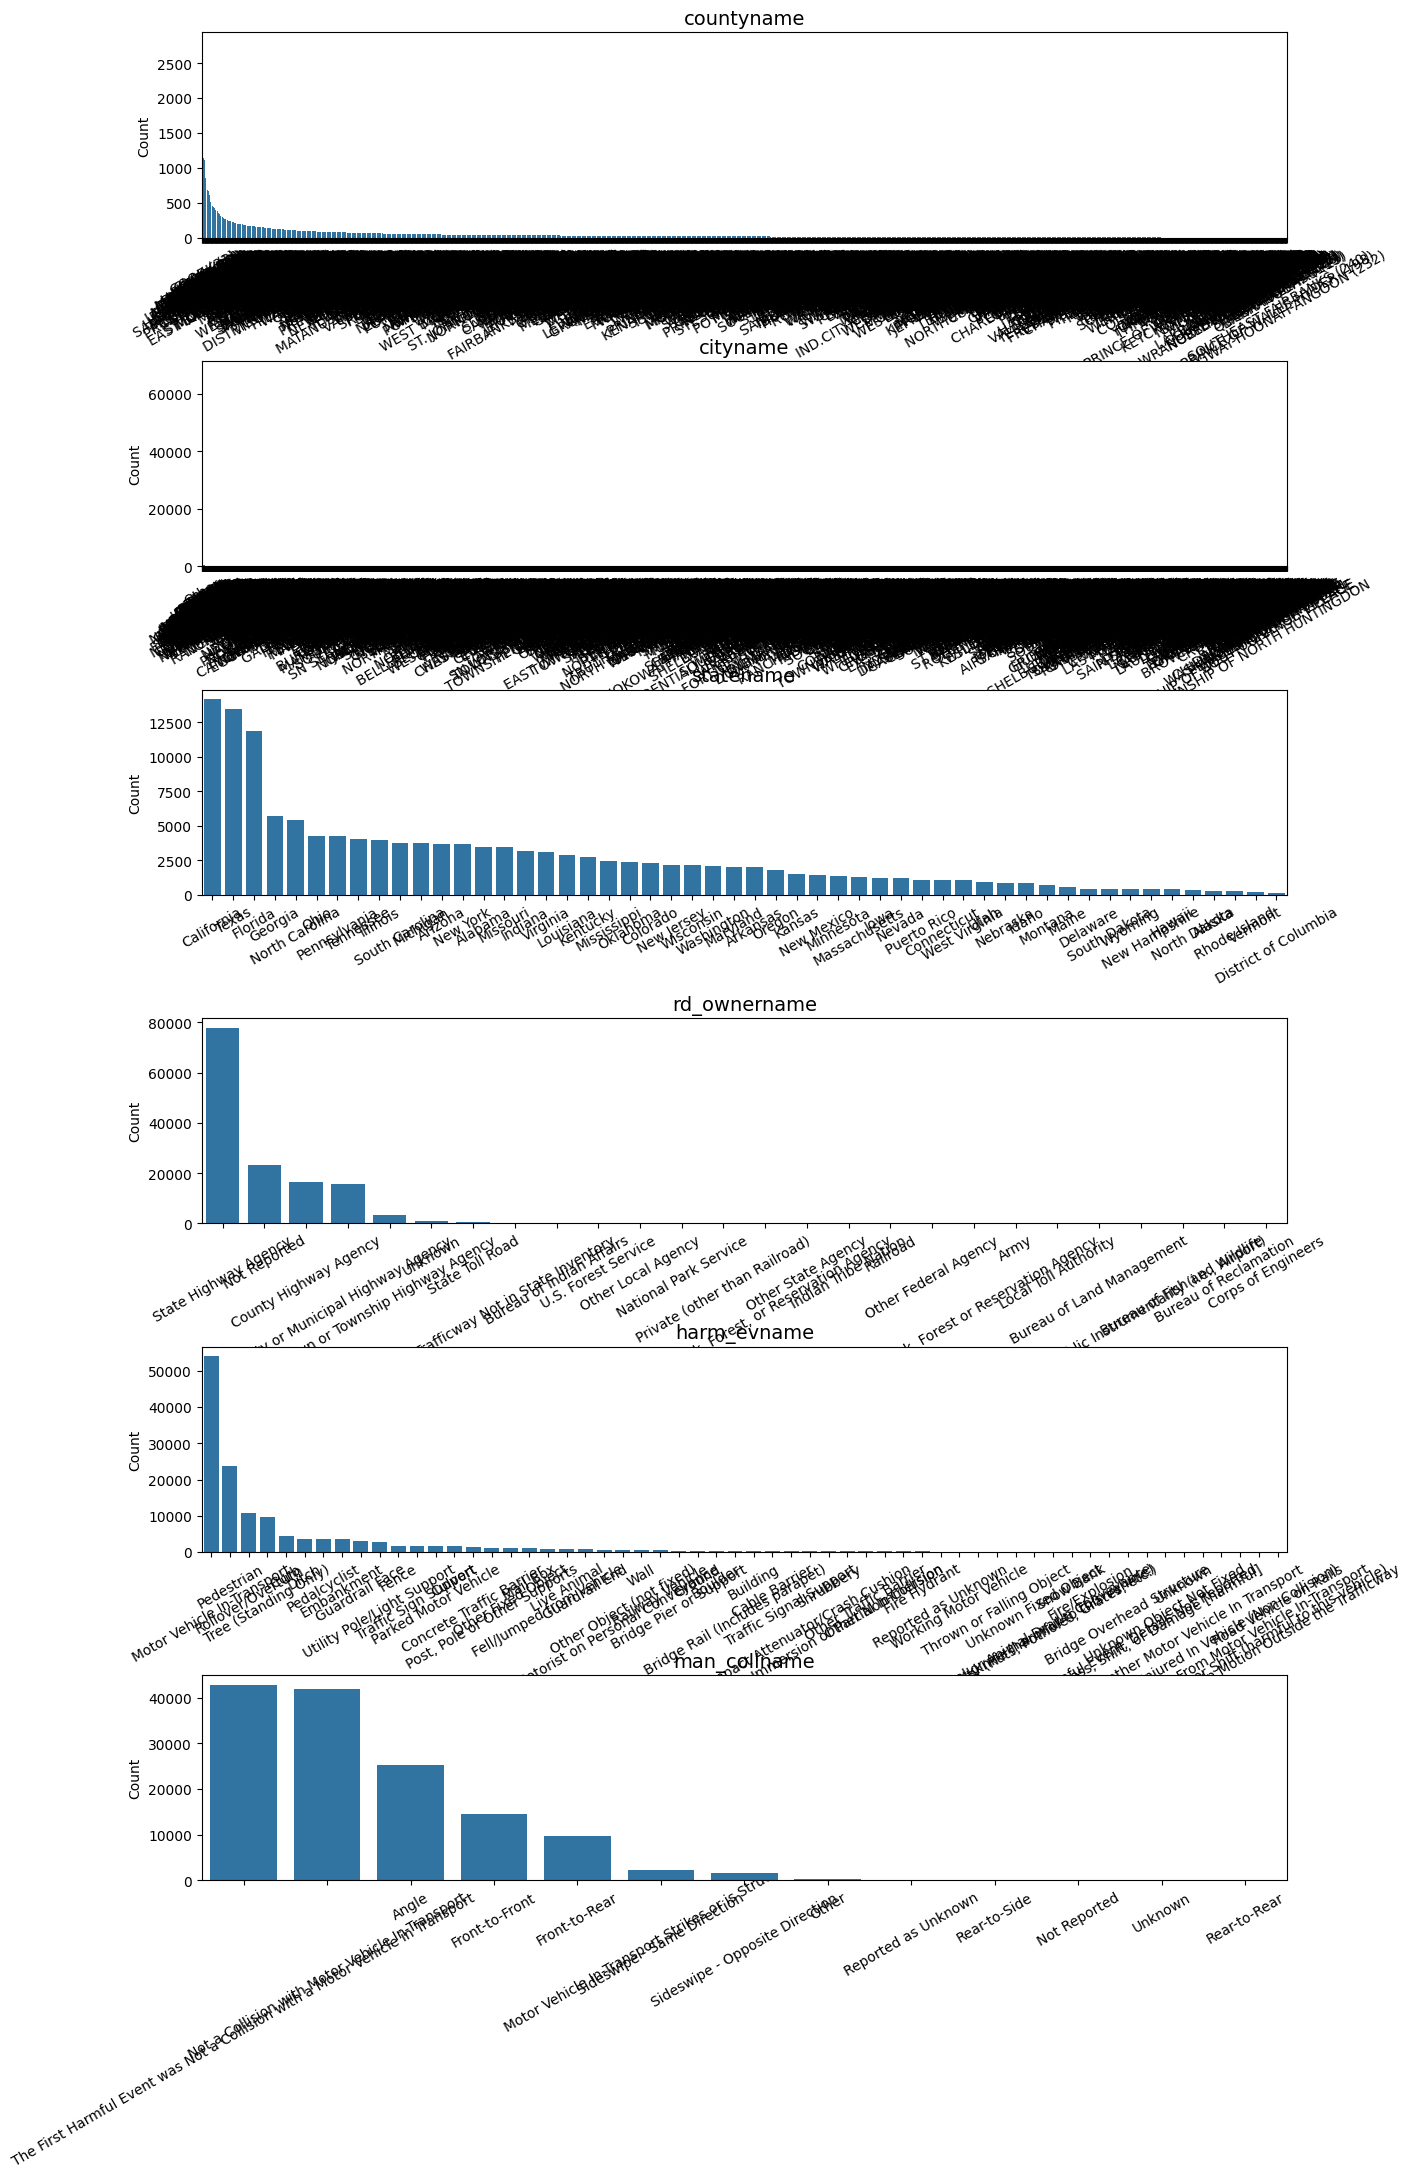

In [ ]:
col_cat = ["countyname", "cityname", "statename", "rd_ownername", "harm_evname", "man_collname"]

n_rows = len(col_cat)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(20, 4 * n_rows))
fig.subplots_adjust(hspace=0.6)

if n_rows == 1:
    axes = [axes]

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel("")  
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


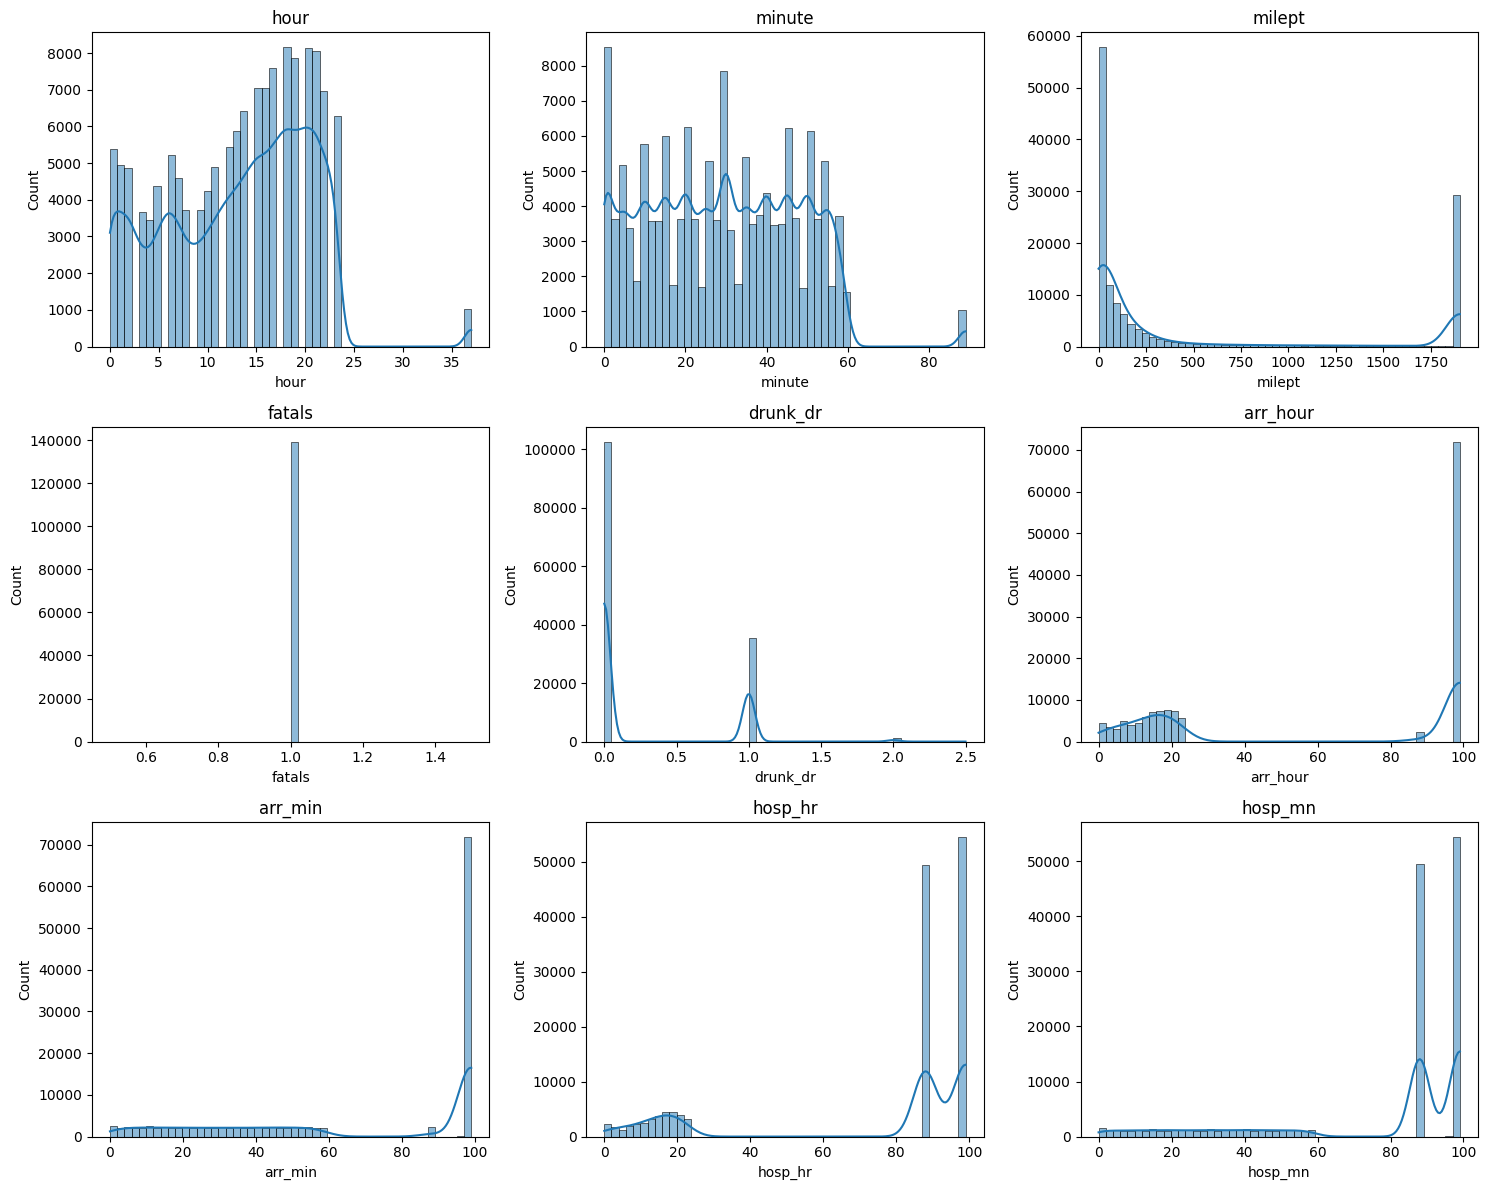

In [20]:
col_num = [
    "hour", "minute", "milept", "fatals", "drunk_dr", 
    "arr_hour", "arr_min", "hosp_hr", "hosp_mn"
]

# Cantidad de filas y columnas del grid
n_cols = 3
n_rows = math.ceil(len(col_num) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
axes = axes.flatten()  # Aplanar para iterar fácilmente
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(col_num):
    nbins = 10 if col == 'age' else 50
    sns.histplot(x=col, data=df, ax=axes[i], bins=nbins, kde=True)
    axes[i].set_title(f"{col}", fontsize=12)

# Si sobran ejes (porque no llenamos el grid), los escondemos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

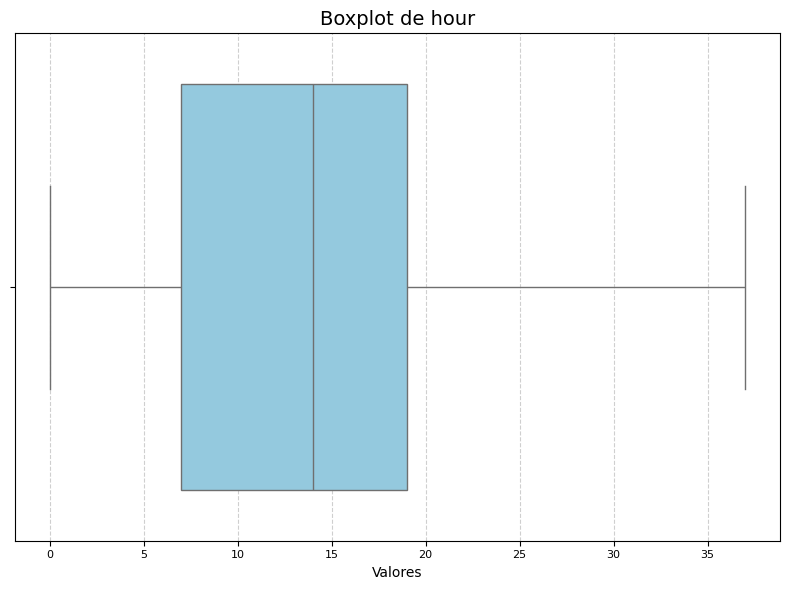

No se encontraron outliers en hour
------------------------------


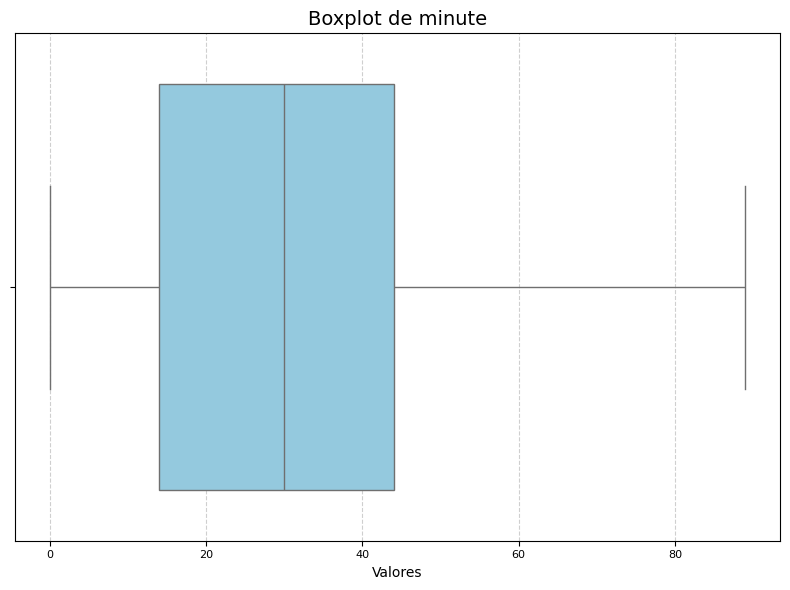

No se encontraron outliers en minute
------------------------------


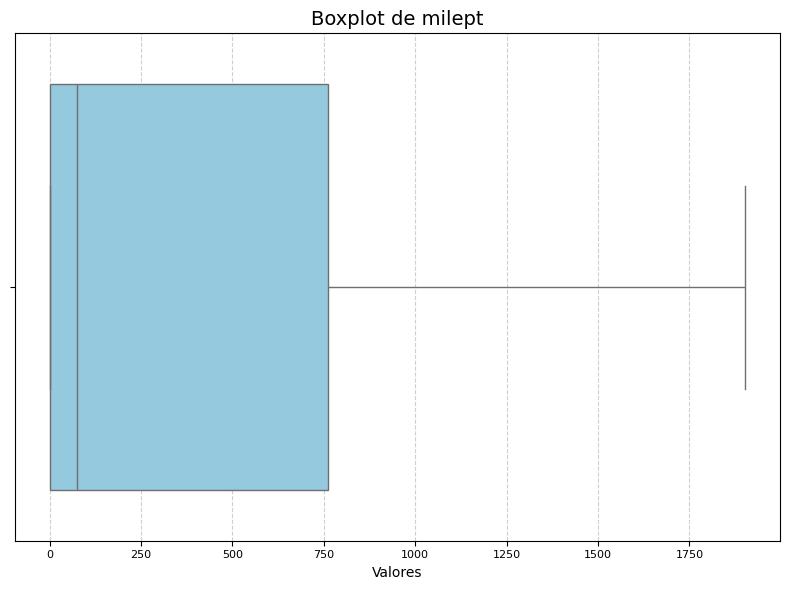

No se encontraron outliers en milept
------------------------------


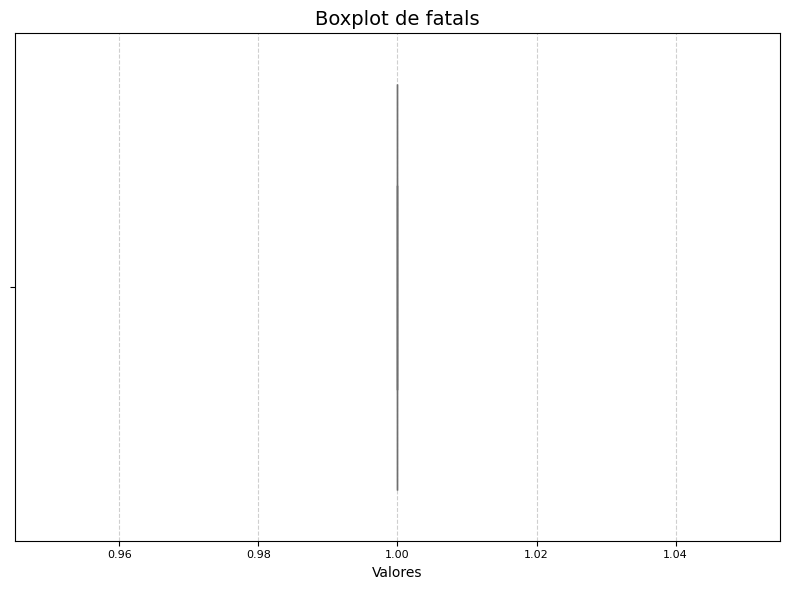

No se encontraron outliers en fatals
------------------------------


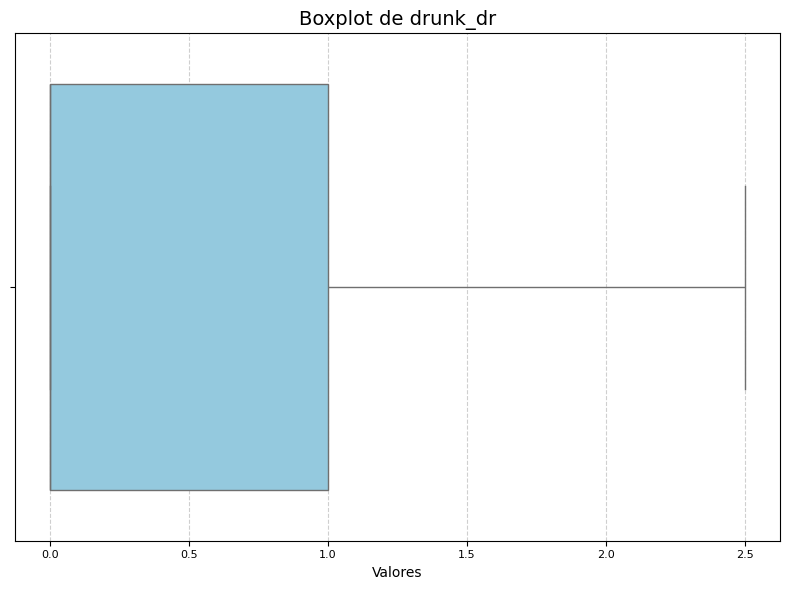

No se encontraron outliers en drunk_dr
------------------------------


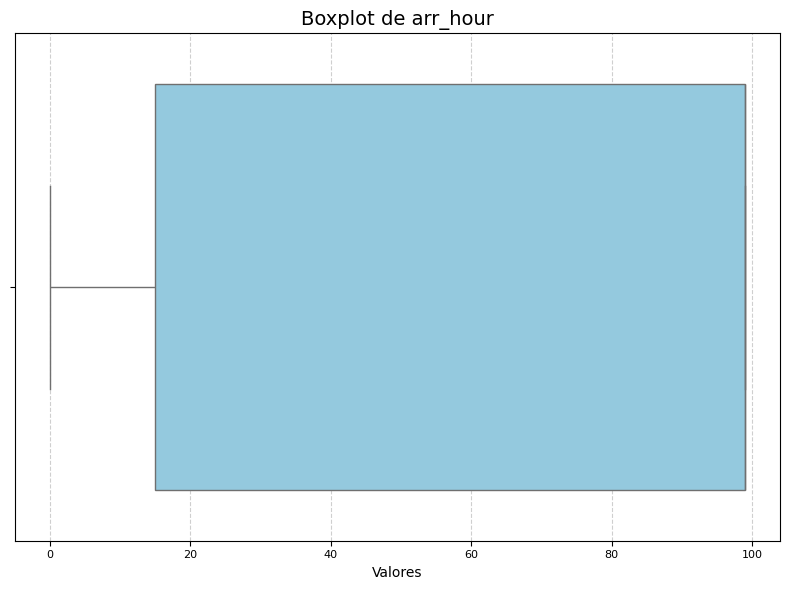

No se encontraron outliers en arr_hour
------------------------------


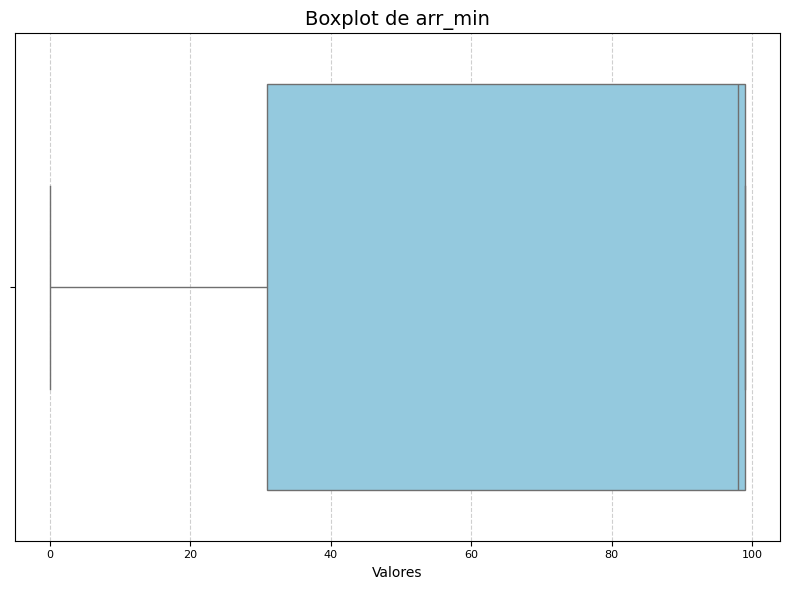

No se encontraron outliers en arr_min
------------------------------


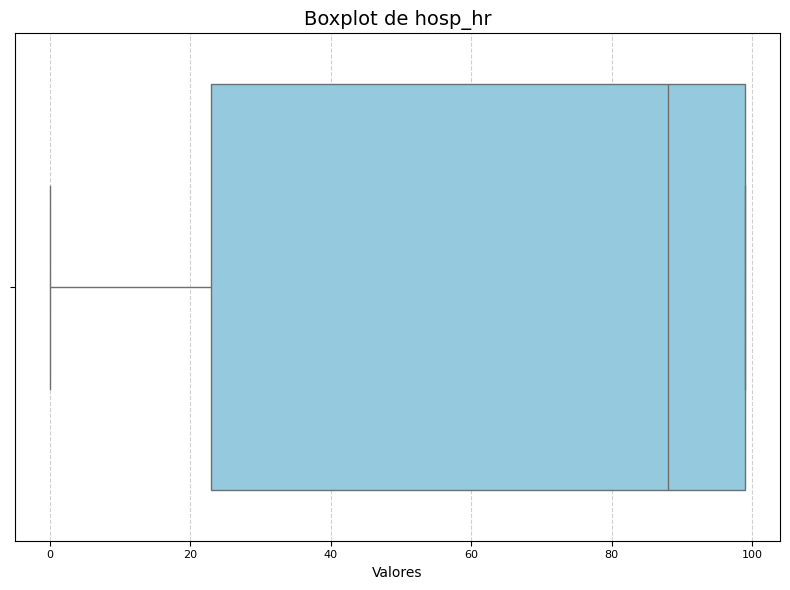

No se encontraron outliers en hosp_hr
------------------------------


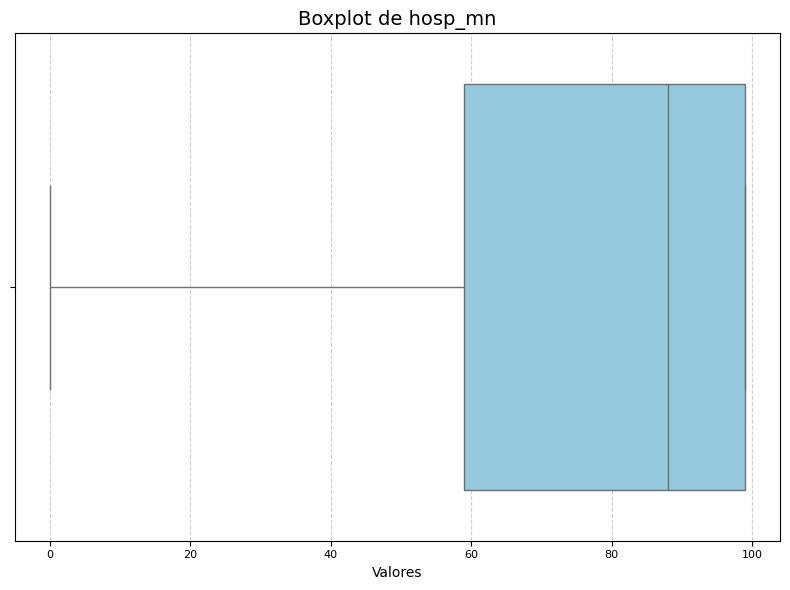

No se encontraron outliers en hosp_mn
------------------------------


In [21]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='skyblue')  
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel('Valores', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers en {col}:")
        print(outliers[[col]])
        print(f"Número de outliers: {len(outliers)}")
        print("-" * 30)
    else:
        print(f"No se encontraron outliers en {col}")
        print("-" * 30)

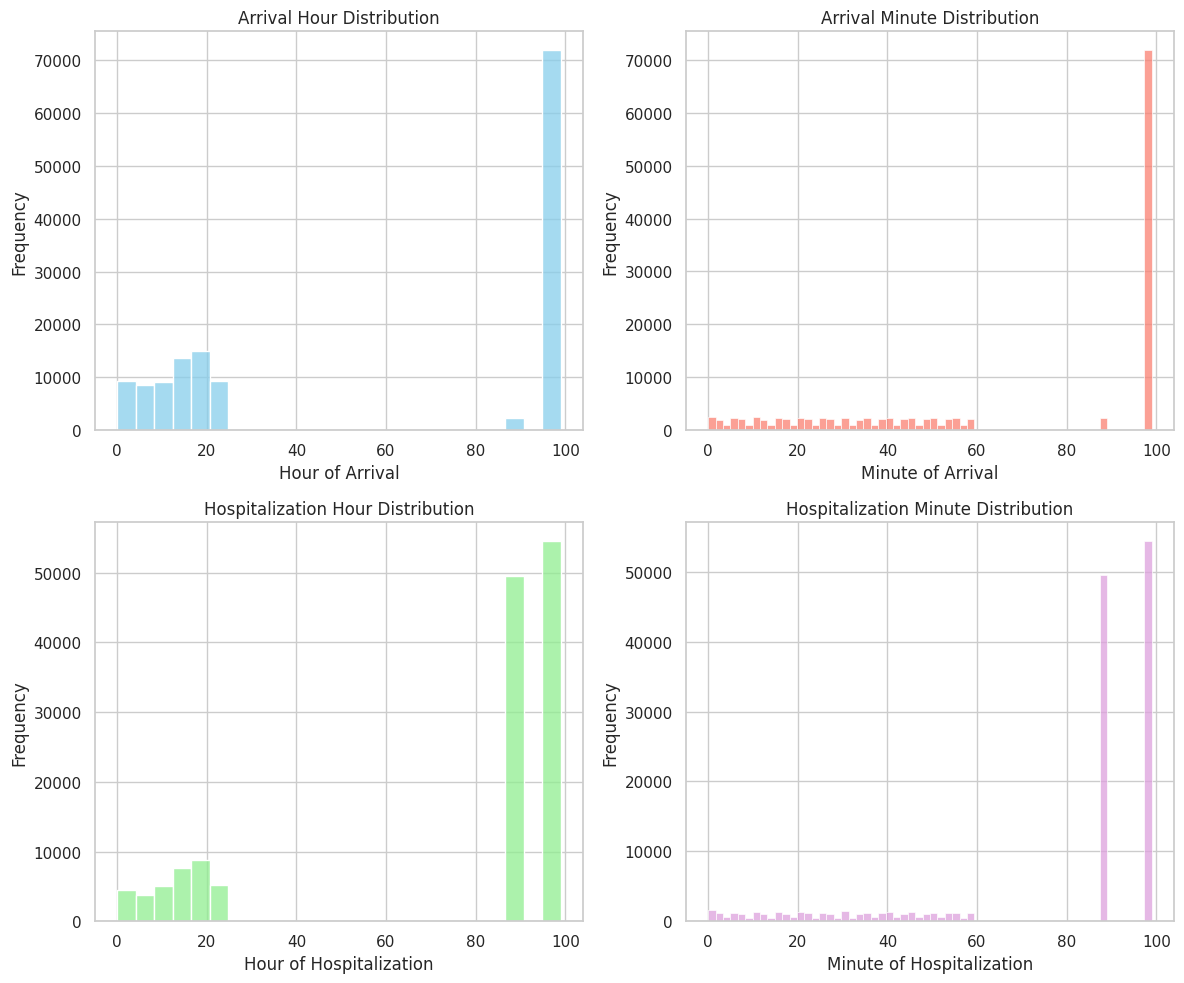

In [23]:
sns.set(style="whitegrid")

# Tamaño general de los gráficos
plt.figure(figsize=(12, 10))

# Histograma 1: arr_hour
plt.subplot(2, 2, 1)
sns.histplot(df['arr_hour'], bins=24, kde=False, color="skyblue")
plt.title('Arrival Hour Distribution')
plt.xlabel('Hour of Arrival')
plt.ylabel('Frequency')

# Histograma 2: arr_min
plt.subplot(2, 2, 2)
sns.histplot(df['arr_min'], bins=60, kde=False, color="salmon")
plt.title('Arrival Minute Distribution')
plt.xlabel('Minute of Arrival')
plt.ylabel('Frequency')

# Histograma 3: hosp_hr
plt.subplot(2, 2, 3)
sns.histplot(df['hosp_hr'], bins=24, kde=False, color="lightgreen")
plt.title('Hospitalization Hour Distribution')
plt.xlabel('Hour of Hospitalization')
plt.ylabel('Frequency')

# Histograma 4: hosp_mn
plt.subplot(2, 2, 4)
sns.histplot(df['hosp_mn'], bins=60, kde=False, color="plum")
plt.title('Hospitalization Minute Distribution')
plt.xlabel('Minute of Hospitalization')
plt.ylabel('Frequency')

# Ajuste final
plt.tight_layout()
plt.show()

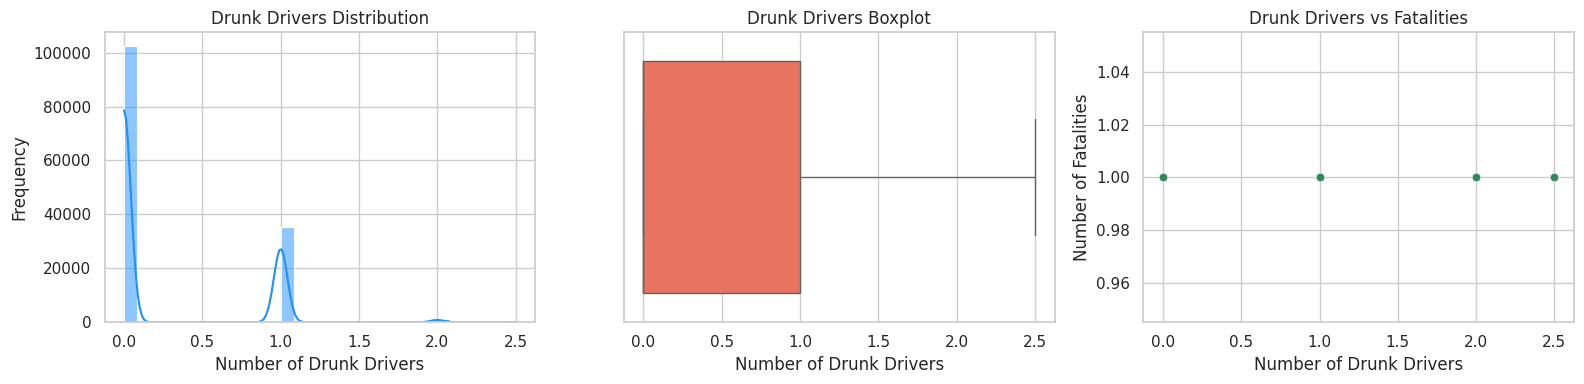

In [24]:
# Histograma de drunk_dr
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['drunk_dr'].dropna(), bins=30, kde=True, color="dodgerblue")
plt.title('Drunk Drivers Distribution')
plt.xlabel('Number of Drunk Drivers')
plt.ylabel('Frequency')

# Boxplot de drunk_dr
plt.subplot(1, 3, 2)
sns.boxplot(x=df['drunk_dr'], color="tomato")
plt.title('Drunk Drivers Boxplot')
plt.xlabel('Number of Drunk Drivers')

# Scatter plot: drunk_dr vs fatals
plt.subplot(1, 3, 3)
sns.scatterplot(x='drunk_dr', y='fatals', data=df, alpha=0.6, color="seagreen")
plt.title('Drunk Drivers vs Fatalities')
plt.xlabel('Number of Drunk Drivers')
plt.ylabel('Number of Fatalities')

plt.tight_layout()
plt.show()


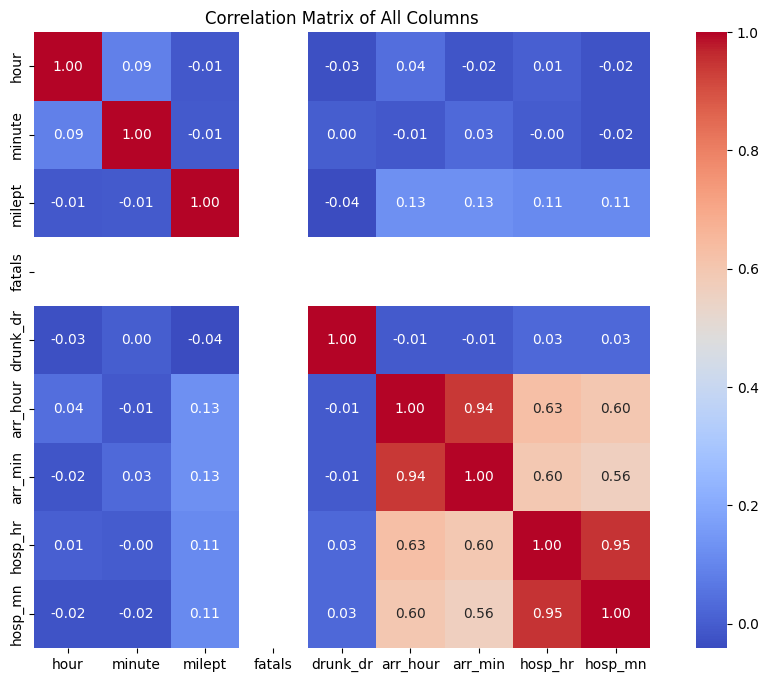

In [22]:
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Mat' \
'rix of All Columns')
plt.show()